<a href="https://colab.research.google.com/github/ggurusaran/test1/blob/main/pneumonia_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network

### Importing the libraries

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
tf.__version__

'2.9.2'

In [4]:
#data augmentation using ImageDataGenerator to make it fit through cnn model
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5234 images belonging to 2 classes.


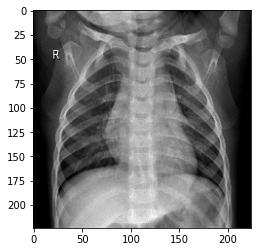

In [6]:
img_path = '/content/drive/MyDrive/chest_xray/train/NORMAL/IM-0117-0001.jpeg'
img = tf.keras.utils.load_img(img_path, target_size=(224,224))
plt.imshow(img)
plt.show()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 624 images belonging to 2 classes.


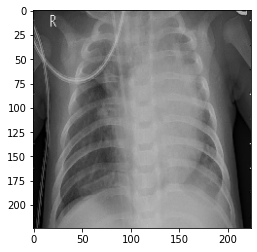

In [8]:
img_path = '/content/drive/MyDrive/chest_xray/test/PNEUMONIA/person100_bacteria_479.jpeg'
img = tf.keras.utils.load_img(img_path, target_size=(224,224))
plt.imshow(img)
plt.show()

## Part 2 - Building the CNN

### Initialising the CNN

In [9]:
cnn = tf.keras.models.Sequential()

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [11]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [12]:


cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [13]:
cnn.add(tf.keras.layers.Flatten())

In [14]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [15]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [17]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
 History = cnn.fit( x = training_set, validation_data = test_set, epochs = 5)

Epoch 1/5
164/164 [==============================] - 655s 4s/step - loss: 0.3870 - accuracy: 0.8258 - val_loss: 0.4508 - val_accuracy: 0.7901
Epoch 2/5
164/164 [==============================] - 65s 398ms/step - loss: 0.2319 - accuracy: 0.9047 - val_loss: 0.3103 - val_accuracy: 0.8686
Epoch 3/5
164/164 [==============================] - 65s 397ms/step - loss: 0.2028 - accuracy: 0.9220 - val_loss: 0.3859 - val_accuracy: 0.8478
Epoch 4/5
164/164 [==============================] - 65s 396ms/step - loss: 0.1944 - accuracy: 0.9194 - val_loss: 0.4587 - val_accuracy: 0.8285
Epoch 5/5
164/164 [==============================] - 65s 396ms/step - loss: 0.1719 - accuracy: 0.9314 - val_loss: 0.3245 - val_accuracy: 0.8814


In [19]:
y_pred = cnn.predict(test_set)

20/20 [==============================] - 6s 285ms/step


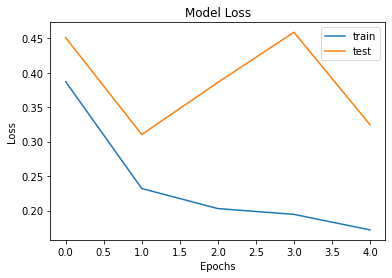

In [20]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

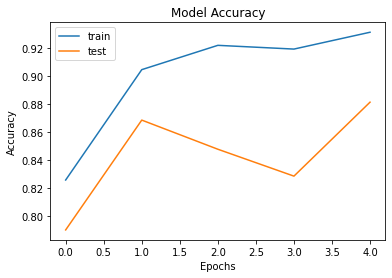

In [21]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

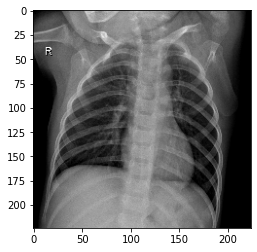

1/1 [==============================] - 0s 26ms/step
No, He is normal


In [33]:
import numpy as np
from keras.preprocessing import image

img_path = '/content/drive/MyDrive/chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg'
img = tf.keras.utils.load_img(img_path, target_size=(224,224))
plt.imshow(img)
plt.show()

test_image = tf.keras.utils.load_img(img_path, target_size = (64, 64))
#convert image format into array

test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Yes, there is pneumonia'
else:
  prediction = 'No, He is normal'

print(prediction)

In [ ]:
vgg16_model = tf.keras.applications.vgg16.VGG16()


In [ ]:
model = tf.keras.applications.MobileNet()

17225924/17225924 [==============================] - 2s 0us/step


In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         